In [ ]:
# 선거분석

In [ ]:
# Analyzing Spatial Models of Choice and Judgment with R

In [ ]:
# Analyzing Issue Scales

In [ ]:
# 3.1 Aldrich-McKelvey Scaling

In [ ]:
# 3.1.1 The basicspace Package in R

In [ ]:
# 3.1.2 Example 1: 2009 European Election Study (French Module)


In [6]:
options(warn=-1)

In [7]:
load("sp_data/election/franceEES2009.Rda")

In [8]:
head(franceEES2009)

     self Extreme Left Communist Socialist Greens UDF (Bayrou) UMP (Sarkozy)
[1,]   77            0         0         1      5            5             9
[2,]   77            0         5         4      5           89             8
[3,]   77           89        89        89     89            6            89
[4,]    3           89        89        89     89           89            89
[5,]   77           77        77        77     77           77            77
[6,]    5            0         0         3     89            0            89
     National Front Left Party
[1,]             10          1
[2,]             10          4
[3,]             10         89
[4,]             89         89
[5,]             77         77
[6,]             89          5

In [9]:
# install.packages('basicspace')

library(basicspace)

Loading required package: tools

## BASIC SPACE SCALING PACKAGE
## 2009 - 2015
## Keith Poole, Howard Rosenthal, Jeffrey Lewis, James Lo, and Royce Carroll
## Support provided by the U.S. National Science Foundation
## NSF Grant SES-0611974



In [10]:
result <- aldmck(franceEES2009, respondent=1, polarity=2, 
                 missing=c(77,88,89), verbose=FALSE)

In [11]:
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 8
Number of Respondents Scaled: 611
Number of Respondents (Positive Weights): 583
Number of Respondents (Negative Weights): 28
Reduction of normalized variance of perceptions: 0.06 

               Location
Extreme Left     -0.467
Communist        -0.322
Left Party       -0.287
Socialist        -0.076
Greens           -0.020
UDF (Bayrou)      0.109
UMP (Sarkozy)     0.449
National Front    0.614




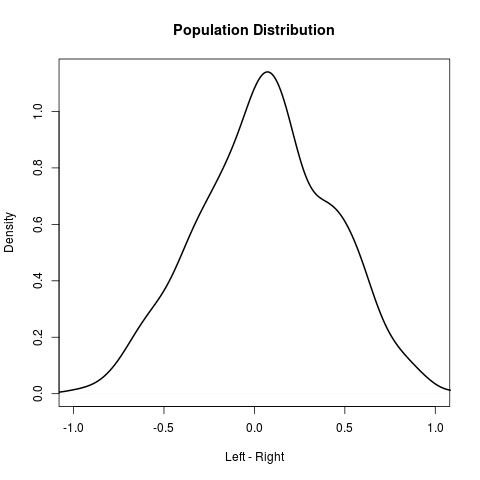

In [12]:
voters <- na.omit(result$respondents)
plot(density(voters[,3]), main="Population Distribution",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)

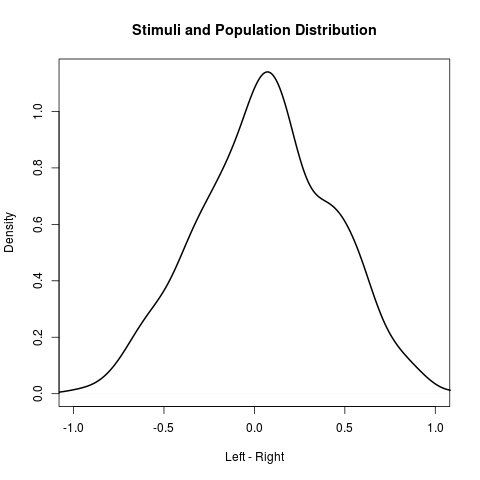

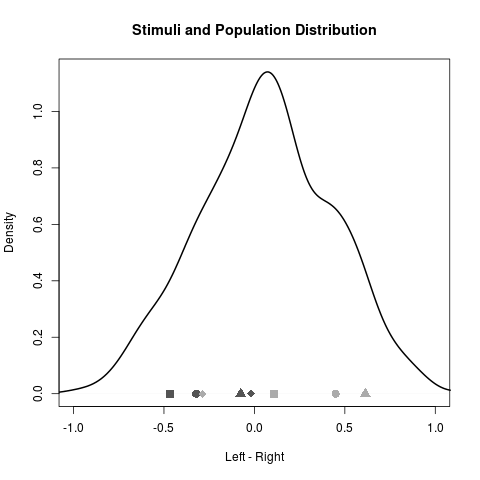

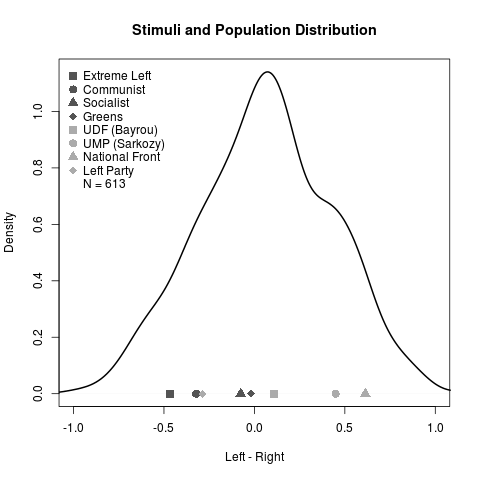

In [13]:
parties <- na.omit(result$stimuli)
party.names <- colnames(franceEES2009)[-1]
total.n <- nrow(voters) + length(parties)
cols <- c("gray33", "gray67")
plot(density(voters[,3]), main="Stimuli and Population Distribution",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

In [38]:
positive.voters <- voters[,3][voters[,5] > 0]

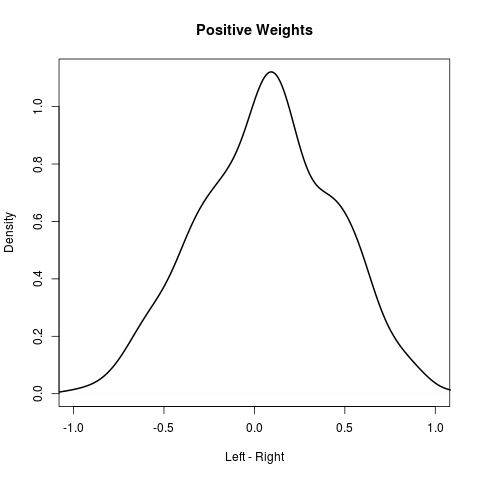

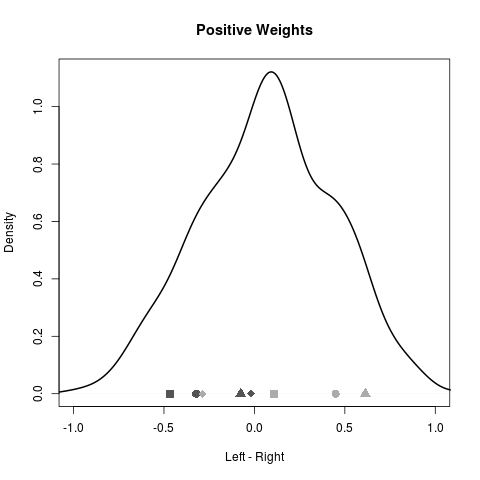

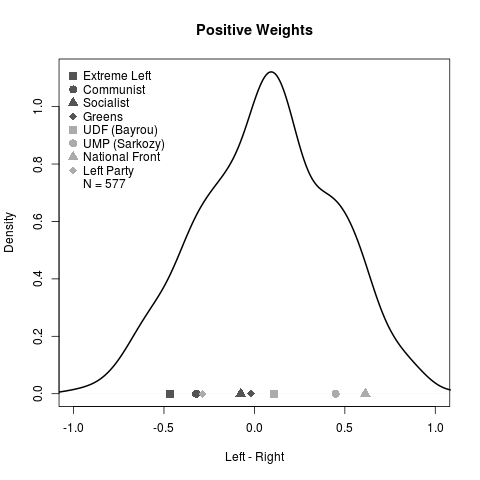

In [39]:
cols <- c("gray33", "gray67")
total.n <- length(positive.voters)
plot(density(positive.voters), main="Positive Weights",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

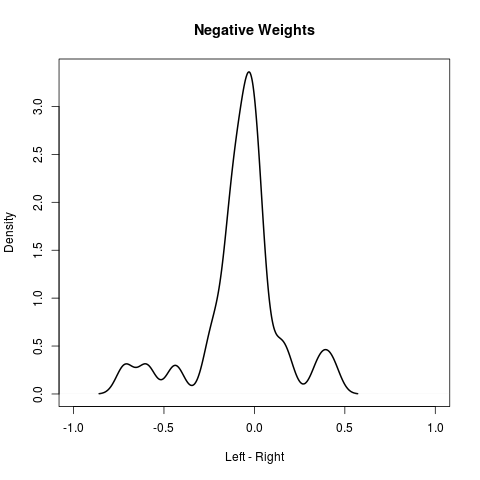

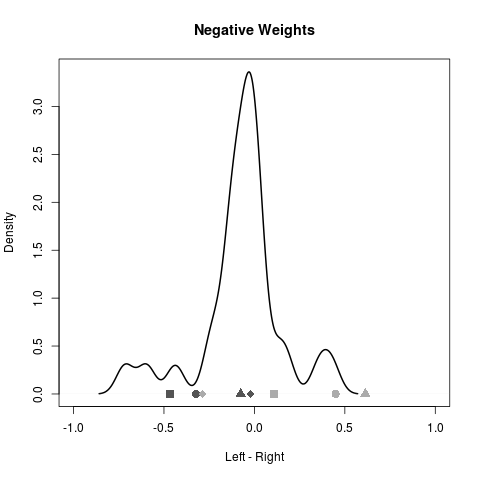

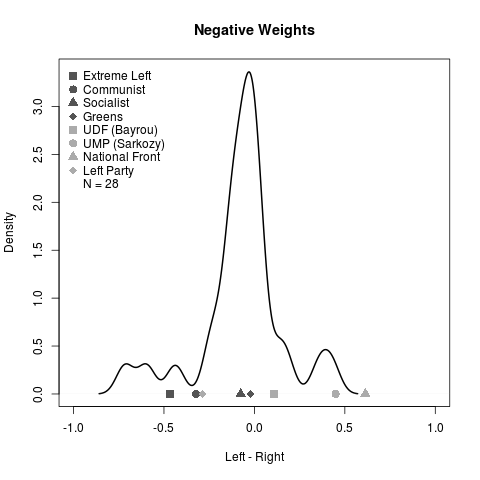

In [40]:
negative.voters <- voters[,3][voters[,5] == 0]
cols <- c("gray33", "gray67")
total.n <- length(negative.voters)
plot(density(negative.voters), main="Negative Weights",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

In [ ]:
# 3.1.3 Example 2: 1968 American National Election Study Urban Unrest and Vietnam War Scales


In [41]:
load("sp_data/election/nes1968_urbanunrest.Rda")

In [42]:
T <- as.matrix(nes1968_urbanunrest[,-1])
result <- aldmck(T, polarity=2, respondent=5,
                 missing=c(8,9), verbose=FALSE)
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 4
Number of Respondents Scaled: 1191
Number of Respondents (Positive Weights): 1110
Number of Respondents (Negative Weights): 81
Reduction of normalized variance of perceptions: 0.09 

         Location
Humphrey   -0.428
Johnson    -0.399
Nixon       0.015
Wallace     0.811




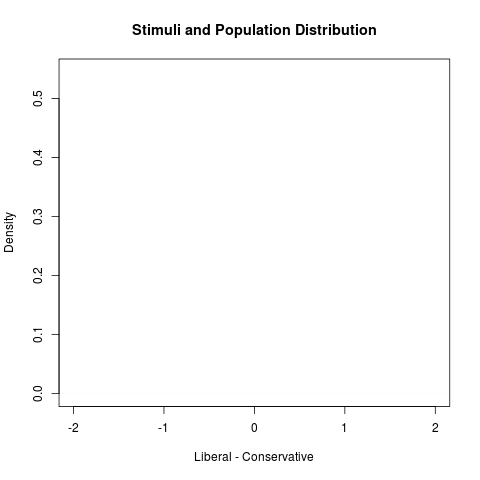

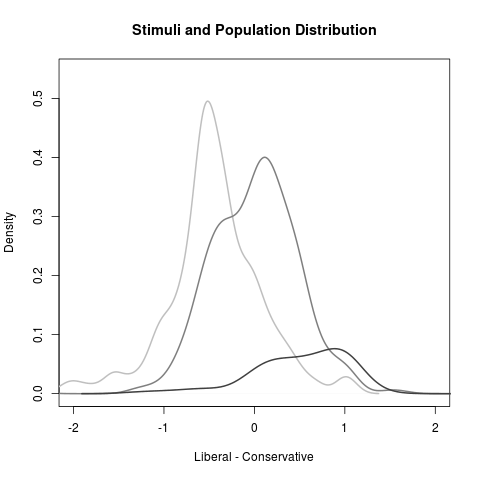

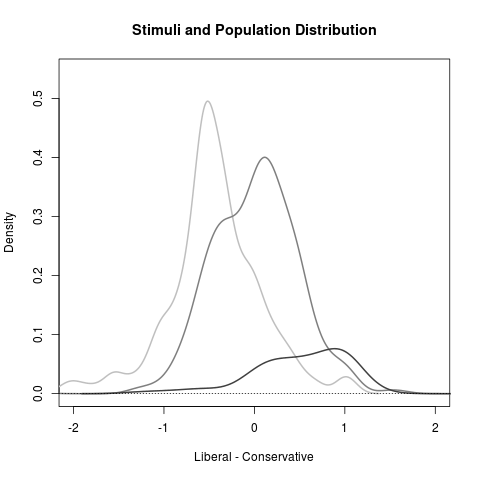

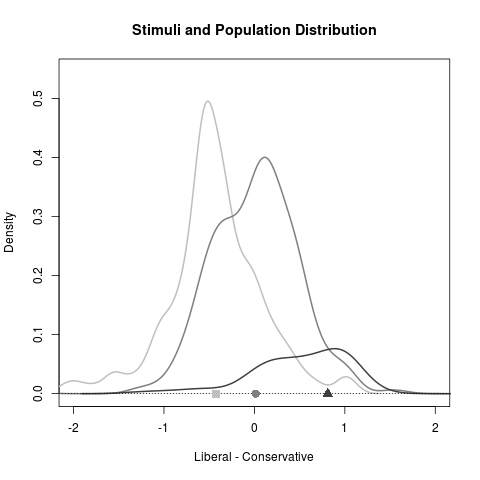

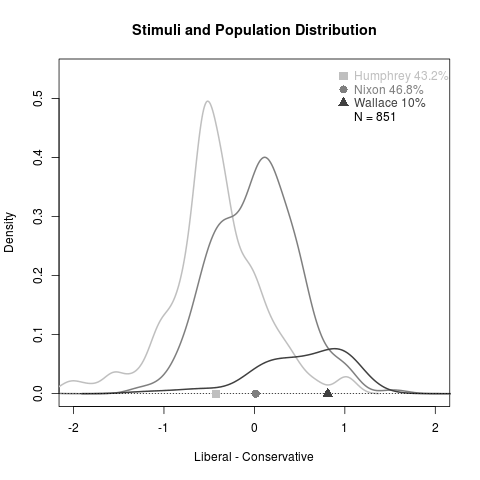

In [43]:
vote <- nes1968_urbanunrest[,1]
voters <- lapply(c(3,5,6), function(x) result$respondents$idealpt[which(result$respondent$weight > 0 & vote == x)])
shares <- sapply(voters, function(x)length(x)/sum(sapply(voters, length)))
dens <- lapply(voters, density)
rescale.dens <- function(x,scale){x$y <- x$y*scale; x}
dens <- lapply(1:length(dens), function(x) rescale.dens(dens[[x]], shares[x]))
ymax <- 1.1*max(sapply(dens, function(x) max(x$y)))
plot(dens[[1]], main="Stimuli and Population Distribution",
     xlab="Liberal - Conservative", ylab="Density",
     xlim=c(-2.0,2.0), ylim=c(0,ymax), type="n")
cols <- c("gray75", "gray50", "gray25")
invisible(sapply(1:length(dens), function(x) lines(dens[[x]], lwd=2,col=cols[x])))
abline(h=0, lty=3)
points(result$stimuli[2:4], rep(0,3), pch=15:17, col=cols, cex=1.5)
cands <- c("Humphrey", "Nixon", "Wallace")
ltext <- c(paste(cands, " ", 100.0*round(shares, 3), "%", sep=""),
           paste("N = ", sum(sapply(voters, length)), sep=""))
legend("topright", ltext, pch = c(15:17,NA), col = c(cols, NA),
       pt.cex = 1.5, text.col=c(cols, "black"), inset=.01, bty="n",
       border=NA)

In [44]:
load("sp_data/election/nes1968_vietnam.Rda")

In [45]:
TT <- as.matrix(nes1968_vietnam[,-1])
result <- aldmck(TT, polarity=2, respondent=5,missing=c(8,9), verbose=FALSE)
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 4
Number of Respondents Scaled: 1031
Number of Respondents (Positive Weights): 800
Number of Respondents (Negative Weights): 231
Reduction of normalized variance of perceptions: 0.19 

         Location
Humphrey   -0.436
Johnson    -0.330
Nixon      -0.068
Wallace     0.834




In [ ]:
# data - http://voteview.com/asmcjr_chapter_3.htm